In [5]:
import numpy as np
import pylab as pl
import scipy as sci
from scipy import optimize
from ridder import *
from newtonRaphson import *
from newtonRaphson2 import *
import matplotlib.pyplot as plt

# Question 1
### 1a)

In [2]:
#define the fucntion and the derivative of the function (needed for the Newton Raphson method)
def f(z):
    return np.sin(z)+3.*np.cos(z)-2
def df(z):
    return np.cos(z)-3.*np.sin(z)

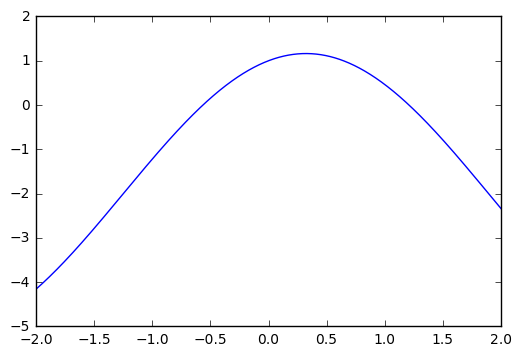

In [3]:
#generate a set of values between +/-2 for x, use this to get a set of y values and plot.
x=np.linspace(-2,2,1000)
y=f(x)
pl.plot(x,y)
pl.show()

Based on the plot we expect 2 roots, one in the interval (−1, 0), and one
in (1, 1.5).
### 1b), c) & d)

In [4]:
#Ridder method requires original function and approximate interval of the root.
r_root1 = ridder(f,-1.,0.)
r_root2 = ridder(f,1.,1.5)
print 'Ridder method results', r_root1, r_root2

Ridder method results -0.564326569396 1.20782767819


In [5]:
#Newton Raphson method requires original function, first derivative and approximate interval of the root.
nr_root1 = newtonRaphson(f,df,-1.,0.)
nr_root2 = newtonRaphson(f,df,1.,1.5)
print 'Newton Raphson method results', nr_root1, nr_root2

Newton Raphson method results -0.564326569397 1.20782767819


In [6]:
#fsolve method requires original function and approximate value of the root (gives more rough value).
a=sci.optimize.fsolve(f,-1.)
b=sci.optimize.fsolve(f,1.)
print 'fsolve results',a,b

fsolve results [-0.56432657] [ 1.20782768]


# Question 2

In [7]:
#This defines the function as a vector array but I have no idea why it's R-C/(1+e*sin(theta+alpha))
#Maybe so the function =0?
def f(z):
    return np.array([6870.-z[0]/(1+z[1]*np.sin(z[2]-np.pi/6.)),6728.-z[0]/(1+z[1]*np.sin(z[2])),6615.-z[0]/(1+z[1]*np.sin(z[2]+np.pi/6.))])

In [8]:
#define an array for the rough values of z[0],z[1],z[2]
x0=np.array([6800.,0.5,0.])

In [9]:
#Use Newton Raphson2 to solve for each parameter of x0
a=newtonRaphson2(f,x0)
print 'Newton-Raphson solution is: C=', a[0], 'e=', a[1], 'alpha=', a[2]

Newton-Raphson solution is: C= 6819.29379321 e= 0.0405989590577 alpha= 0.34078399795


In [10]:
#Use fsolve to solve for each parameter of x0
b=sci.optimize.fsolve(f,x0)
print 'fsolve solution is: C=', b[0], 'e=', b[1], 'alpha=', b[2]

fsolve solution is: C= 6819.29379321 e= 0.0405989590577 alpha= 0.340783997955


In [11]:
print 'Pericentre is at R=',b[0]/(1.+b[1]), 'at angle', -a[2]+np.pi/2., 'radians'

Pericentre is at R= 6553.23910701 at angle 1.23001232884 radians


In [14]:
#generate set of values for theta and define the function for R with coefficients caluculated by NewtonRaphson2 method. (for plotting on a polar plot.)
theta = np.linspace( 0, 2*np.pi, 100 )
R = a[0] / (1 + a[1] * np.sin(theta + a[2]))

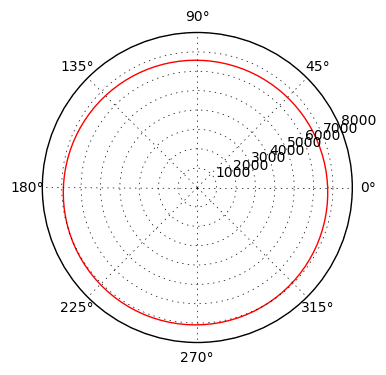

In [15]:
#Plot points on a polar plot to visualise the orbit.
ax = plt.subplot( 111, polar=True )
ax.hold('on')
ax.plot(theta, R, color='red', linewidth=1 )
ax.set_rmax(8000)
ax.grid(True)
plt.show()

# Past Paper Question 2014-15

In [6]:
def f(x):
    return 1-np.exp(-c0*x)-x

In [7]:
c0=2

x1=np.linspace(-0.2,1,1000)
pl.plot(x1,f(x1))
pl.show()

Answers lie somwhere in the interval [-0.2,1.0]

In [8]:
a=optimize.fsolve(f,1.,xtol=1e-7)
b=optimize.fsolve(f,-0.2,xtol=1e-7)

print 'x=', a, b

x= [ 0.79681213] [ 0.]


In [10]:
c_range = np.arange(0,3.01,0.01)

def g(c):
    func = lambda x : (1-np.exp(-c*x)-x)
    func_sol = optimize.fsolve(func,1.,xtol=1e-7)
    return func_sol

In [11]:
x_plot = np.zeros(len(c_range))

for i in range(len(c_range)):
    x_plot[i] = g(c_range[i])

C:\Program Files\Anaconda\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [12]:
pl.plot(c_range,x_plot)
plt.title(r'Graph of $x(c)$ vs $c$')
plt.legend(loc=0)
plt.xlabel(r'$c$')
plt.ylabel(r'$x(c)$')
plt.show()

C:\Program Files\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
